# Basic stock comparison

Example below shows a chart and a basic statistical comparison of two aviation specific stocks. Lufthansa and MTU Aero Engines.

Code is generic and can be used for any comparison of two tickers.

In [1]:
import seaborn
import numpy as np
import yfinance as yf
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib.dates as matplot_dates

### common functions ###
def fetch_ticker(ticker_name):
    # fetch ticker data from yahoo finance
    return yf.Ticker(ticker_name)

def fetch_ticker_hist(ticker, duration="30d"):
    # fetch history
    return ticker.history(period=duration)

### PLOT operations ###
def plot_side_by_side(ticker_1_hist, ticker_2_hist, duration="30d"):

    fig, axes = plt.subplots(nrows=1, ncols=2)
    axes[0].plot(ticker_1_hist.index.strftime('%d/%m'), ticker_1_hist['Close'])
    axes[0].axes.get_xaxis().set_visible(False)
    axes[1].plot(ticker_2_hist.index.strftime('%d/%m'), ticker_2_hist['Close'])
    axes[1].axes.get_xaxis().set_visible(False)
    plt.show()
    
def plot_at_once(ticker_1_hist, ticker_2_hist, duration="1y"):

    fig, ax_1 = plt.subplots()

    color = 'tab:blue'
    ax_1.set_xlabel('time')
    ax_1.set_ylabel('Close ticker_1 ', color=color)
    ax_1.plot(ticker_1_hist.index, ticker_1_hist['Close'], color=color)
    ax_1.tick_params(axis='y', labelcolor=color)

    ax_2 = ax_1.twinx() 

    color = 'tab:red'
    ax_2.set_ylabel('Close ticker_2', color=color) 
    ax_2.plot(ticker_2_hist.index, ticker_2_hist['Close'], color=color)
    ax_2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout() 
    plt.show()

def plot_regression(ticker_hist, degree):
        # polynomial fit AMUNDI data

        x = matplot_dates.date2num(ticker_hist.index)
        coefs = np.poly1d(np.polyfit(x, ticker_hist['Close'], degree))

        ffit = np.poly1d(coefs)
        x_new = np.linspace(x[0], x[-1], num=len(x)*10)

        plt.plot(x_new, ffit(x_new))
        plt.plot(x, ticker_hist['Close'])


def calc_mean(sample):
    n = len(sample)
    sum_of_items = 0.0
    for item in sample:
        sum_of_items = sum_of_items + item
    return sum_of_items / n

def calc_variance(sample):
    n = len(sample)
    mean = calc_mean(sample)
    temp = 0
    for item in sample:
        temp = temp + ((item - mean)**2)
    return temp / (n)

def calc_sample_covariance(x,y):
    if len(x) != len(y):
        print(len(x))
        print(len(y))
        print("len(x) != len(y)")
        return 0
    n = len(x)
    mean_x = calc_mean(x)
    mean_y = calc_mean(y)
    temp = 0
    for i in range(n):
        temp = temp + ((y[i] - mean_y)*(x[i] - mean_x))
    return temp / (n-1)

def calc_corr_coeff(x,y):
    cov = calc_sample_covariance(x,y)
    var1 = sqrt(calc_variance(x))
    var2 = sqrt(calc_variance(y))
    return cov/(var1*var2)

In [2]:
# define desired tickers
# Lufthansa
ticker_1 = fetch_ticker("LHA.DE")
# 
ticker_2 = fetch_ticker("MTX.F")

# fetch historical data
ticker_1_hist = fetch_ticker_hist(ticker_1)
ticker_2_hist = fetch_ticker_hist(ticker_2)

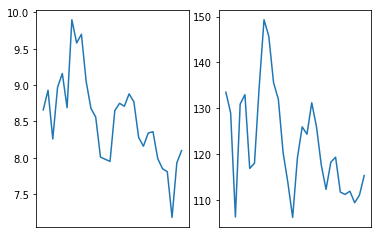

In [3]:
plot_side_by_side(ticker_1_hist, ticker_2_hist)


/home/milky/.local/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


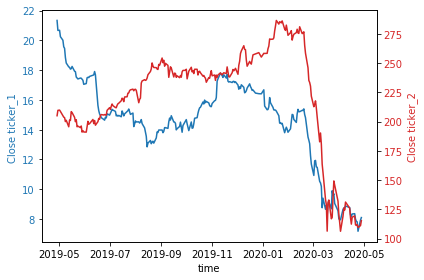

In [4]:
# fetch historical data
ticker_1_hist = fetch_ticker_hist(ticker_1, "1y")
ticker_2_hist = fetch_ticker_hist(ticker_2, "1y")

plot_at_once(ticker_1_hist, ticker_2_hist)

In [5]:
# get variance
x = ticker_1_hist['Close']
y = ticker_2_hist['Close']
ticker_1_var = calc_variance(x)
ticker_2_var = calc_variance(y)
print(ticker_1_var)
print(ticker_2_var)

8.25960595081
1955.57923926


In [6]:
# get Bravais - Pearson correlation coefficient
calc_corr_coeff(x,y)

0.6106046265250615

/home/milky/.local/lib/python2.7/site-packages/ipykernel_launcher.py:51: RankWarning: Polyfit may be poorly conditioned


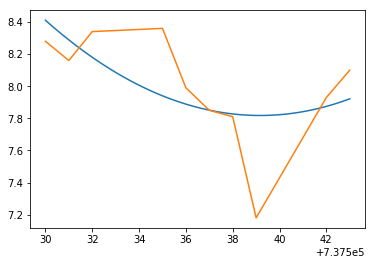

In [21]:
# regression over 10 days ticker 1
ticker_1_hist = fetch_ticker_hist(ticker_1, "10d")
plot_regression(ticker_1_hist, 3)

/home/milky/.local/lib/python2.7/site-packages/ipykernel_launcher.py:51: RankWarning: Polyfit may be poorly conditioned


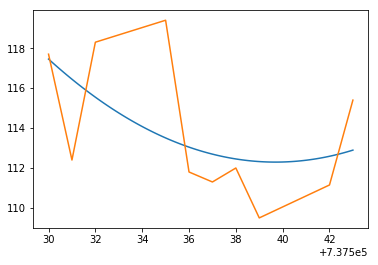

In [20]:
# regression over 10 days ticker 2
ticker_2_hist = fetch_ticker_hist(ticker_2, "10d")
plot_regression(ticker_2_hist, 3)

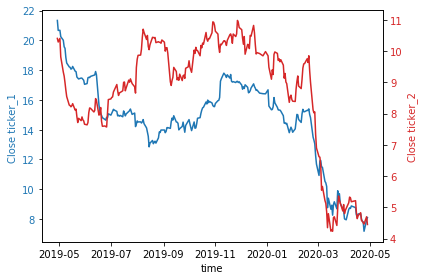

In [9]:
#  add Air France KLM ticker and compare with Lufthansa 

ticker_3 = fetch_ticker("AFR.F")

# fetch historical data
ticker_1_hist = fetch_ticker_hist(ticker_1, "1y")
ticker_3_hist = fetch_ticker_hist(ticker_3, "1y")

plot_at_once(ticker_1_hist, ticker_3_hist)

In [10]:
# get variance
ticker_1_var = calc_variance(ticker_1_hist['Close'])
ticker_3_var = calc_variance(ticker_3_hist['Close'])
print(ticker_1_var)
print(ticker_3_var)

# get Bravais - Pearson correlation coefficient
calc_corr_coeff(ticker_1_hist['Close'],ticker_3_hist['Close'])

8.25960595081
3.38944052877


0.7580914302126704

/home/milky/.local/lib/python2.7/site-packages/ipykernel_launcher.py:51: RankWarning: Polyfit may be poorly conditioned


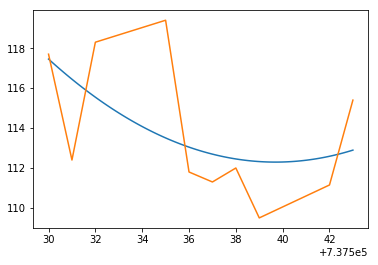

In [22]:
# regression over 10 days ticker 2
ticker_3_hist = fetch_ticker_hist(ticker_3, "10d")
plot_regression(ticker_2_hist, 3)

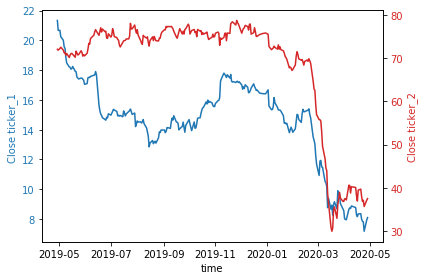

In [29]:
# add FRAPORT ticker and compare to Lufthansa
ticker_4 = fetch_ticker("FRA.DE")

# fetch historical data
ticker_1_hist = fetch_ticker_hist(ticker_1, "1y")
ticker_4_hist = fetch_ticker_hist(ticker_4, "1y")

plot_at_once(ticker_1_hist, ticker_4_hist)

In [30]:
calc_corr_coeff(ticker_1_hist['Close'],ticker_4_hist['Close'])

0.8377647250017235